In [2]:
import pandas as pd 
from prophet import Prophet
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,10))

ModuleNotFoundError: No module named 'prophet'

In [4]:
data = pd.read_feather('base/gs.feather')

23:22:04 - cmdstanpy - INFO - Chain [1] start processing


LATAM


23:22:05 - cmdstanpy - INFO - Chain [1] done processing


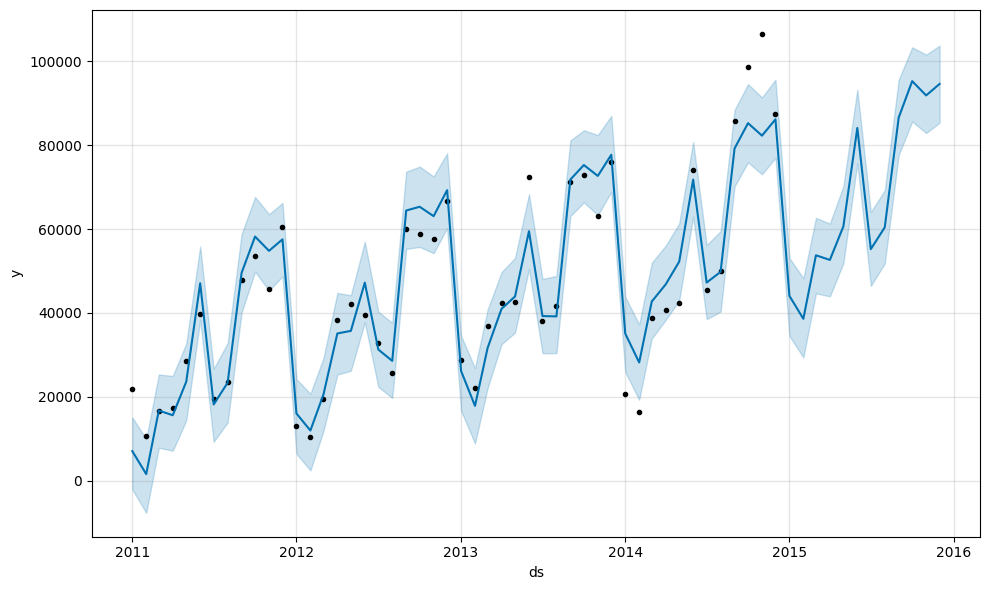

/tmp/ipykernel_3523/3206858584.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(
23:22:05 - cmdstanpy - INFO - Chain [1] start processing
23:22:05 - cmdstanpy - INFO - Chain [1] done processing


EU


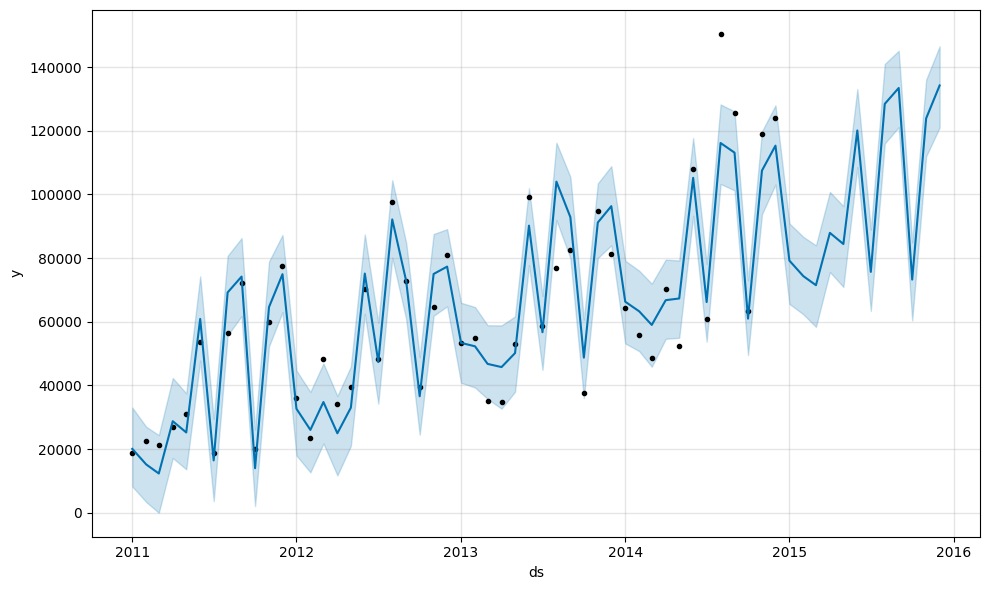

/tmp/ipykernel_3523/3206858584.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(
23:22:06 - cmdstanpy - INFO - Chain [1] start processing


APAC


23:22:06 - cmdstanpy - INFO - Chain [1] done processing


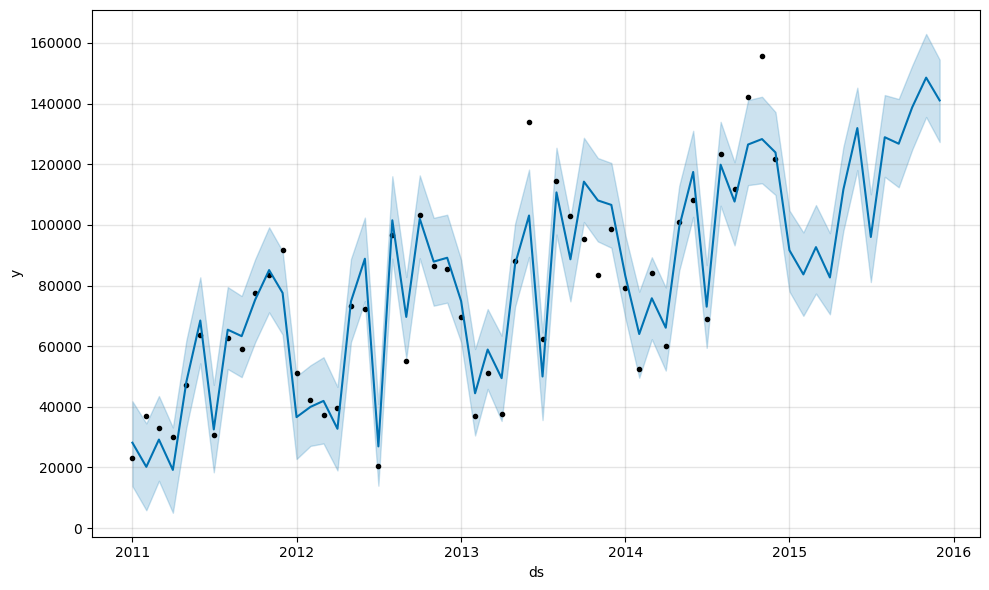

/tmp/ipykernel_3523/3206858584.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(
23:22:07 - cmdstanpy - INFO - Chain [1] start processing


US


23:22:07 - cmdstanpy - INFO - Chain [1] done processing


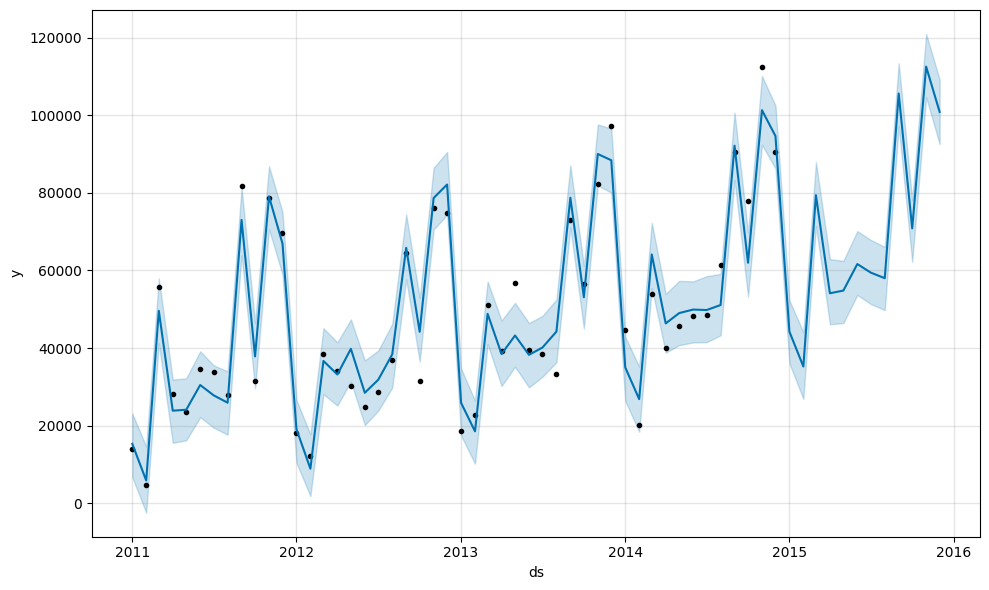

/tmp/ipykernel_3523/3206858584.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(
23:22:08 - cmdstanpy - INFO - Chain [1] start processing


Africa


23:22:08 - cmdstanpy - INFO - Chain [1] done processing


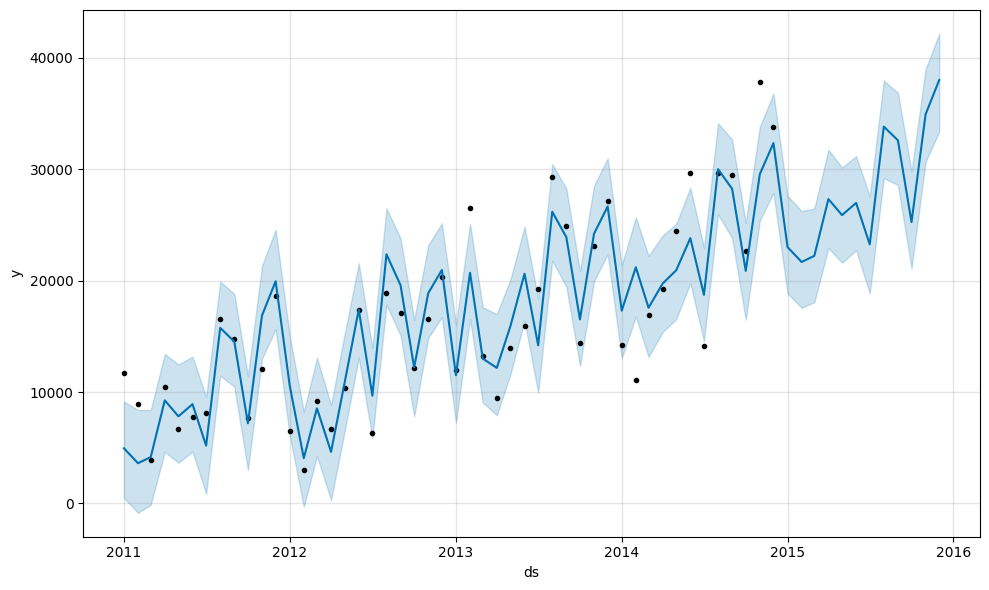

/tmp/ipykernel_3523/3206858584.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(
23:22:09 - cmdstanpy - INFO - Chain [1] start processing


EMEA


23:22:09 - cmdstanpy - INFO - Chain [1] done processing


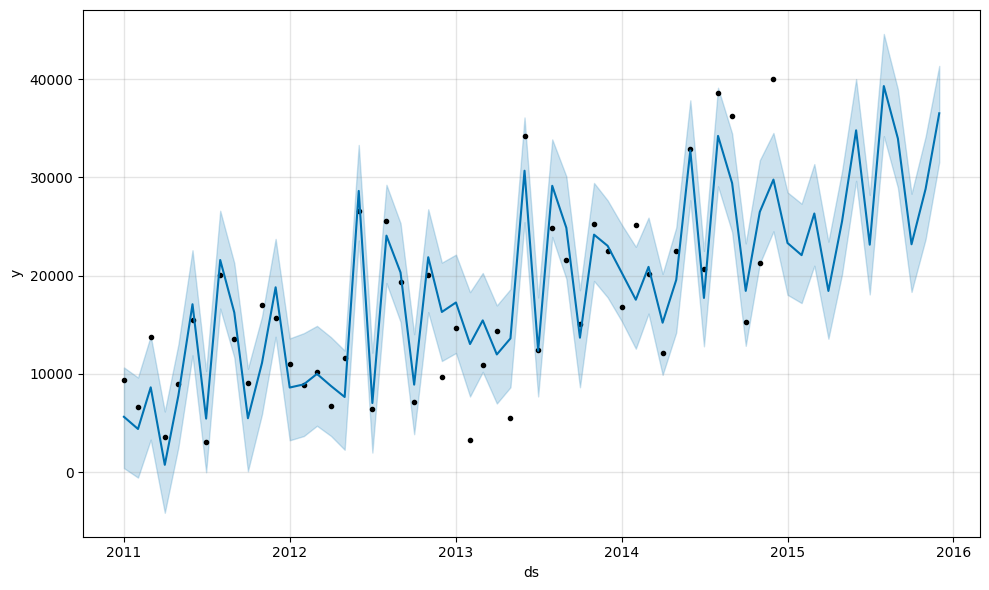

/tmp/ipykernel_3523/3206858584.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(
23:22:10 - cmdstanpy - INFO - Chain [1] start processing


Canada


23:22:10 - cmdstanpy - INFO - Chain [1] done processing


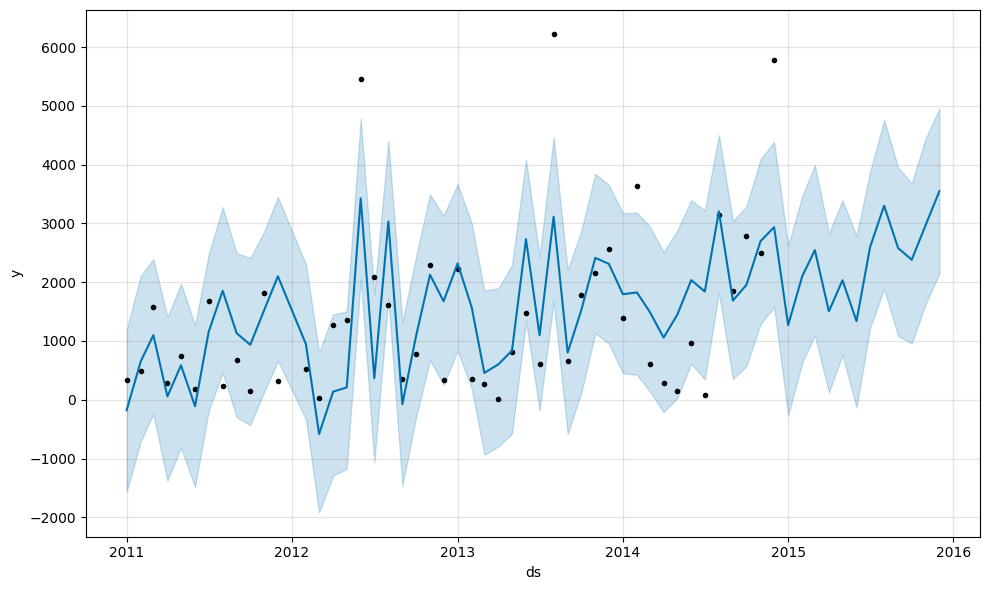

/tmp/ipykernel_3523/3206858584.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_market = regressao_market.append(


,Market,ds,yhat,yhat_lower,yhat_upper
0,LATAM,2011-01-01,7070.056736,-2071.212650,15131.591656
1,LATAM,2011-02-01,1597.761500,-7626.500868,9975.351193
2,LATAM,2011-03-01,16738.231652,7869.598275,25339.985275
3,LATAM,2011-04-01,15623.035671,7171.443352,24980.200108
4,LATAM,2011-05-01,23615.807581,14383.239279,32717.941735
...,...,...,...,...,...
414,Canada,2015-08-01,3302.438715,1887.462952,4757.920283
415,Canada,2015-09-01,2578.983705,1082.498351,3946.174768
416,Canada,2015-10-01,2383.202909,959.099893,3685.930009
417,Canada,2015-11-01,2978.114609,1635.957863,4454.205359


In [11]:
# Regressão com Sazonalidades
regressao_market = pd.DataFrame()
for market in data['Market'].unique():
    print(market)
    regressao = data[data['Market'] == market][
        ['Order Date Month', 'Sales']
    ].groupby('Order Date Month')['Sales'].sum().reset_index()
    regressao = regressao.rename(columns={
        'Order Date Month': 'ds', 'Sales': 'y'
    })
    m = Prophet().fit(regressao)
    future = m.make_future_dataframe(periods=12, freq='MS')
    forecast = m.predict(future)
    forecast['Market'] = market
    fig1 = m.plot(forecast)
    plt.show()
    regressao_market = regressao_market.append(
        forecast[['Market', 'ds', 'yhat', 'yhat_lower', 'yhat_upper']],
        ignore_index = True
    )
regressao_market

In [12]:
regressao_market.to_feather('base/regressao_mercado.feather')

23:25:27 - cmdstanpy - INFO - Chain [1] start processing


North


23:25:28 - cmdstanpy - INFO - Chain [1] done processing


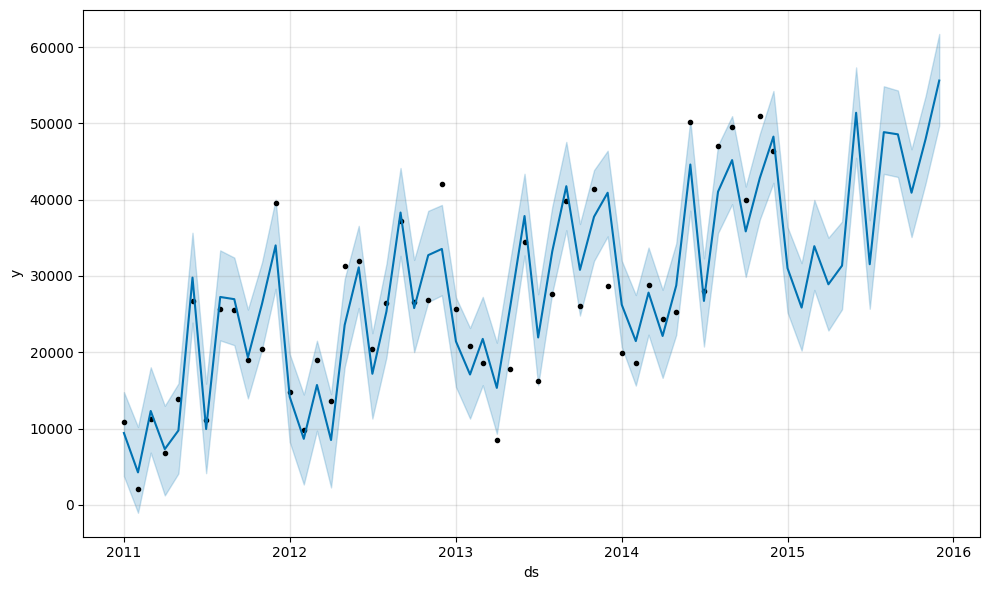

/tmp/ipykernel_3523/3734246913.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_region.append(
23:25:28 - cmdstanpy - INFO - Chain [1] start processing


South


23:25:29 - cmdstanpy - INFO - Chain [1] done processing


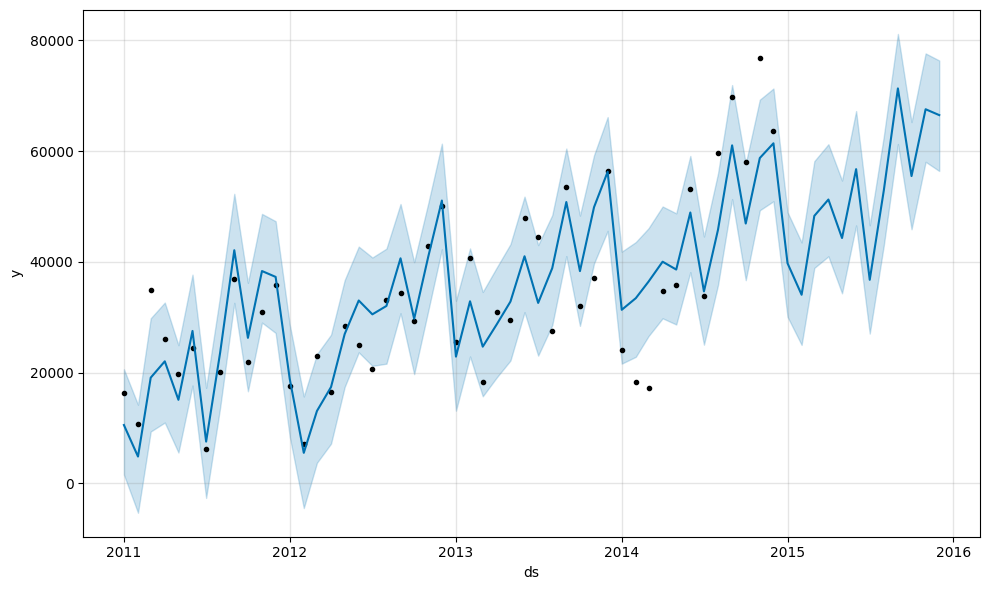

/tmp/ipykernel_3523/3734246913.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_region.append(
23:25:29 - cmdstanpy - INFO - Chain [1] start processing


Central


23:25:30 - cmdstanpy - INFO - Chain [1] done processing


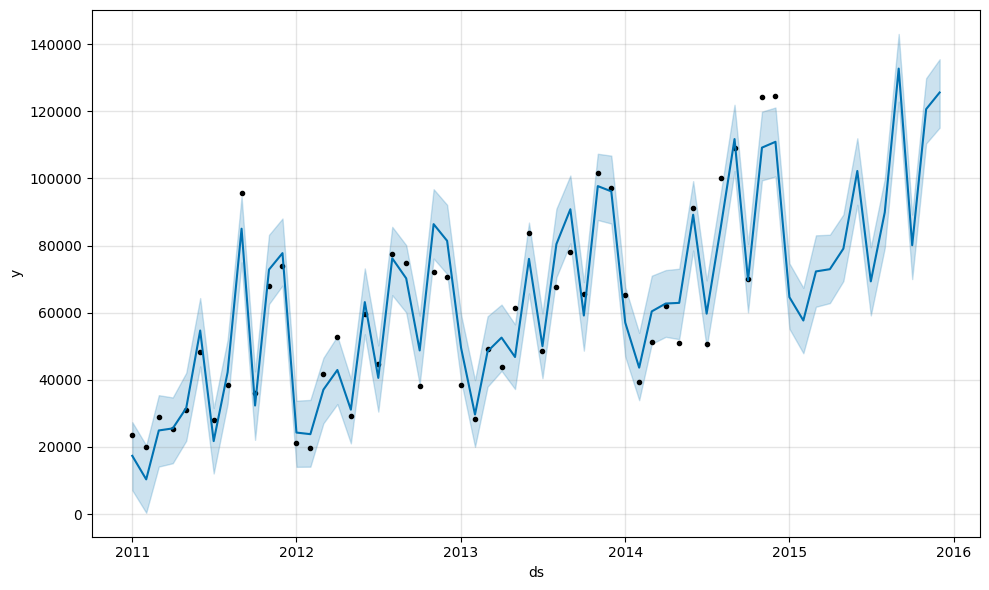

/tmp/ipykernel_3523/3734246913.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_region.append(
23:25:30 - cmdstanpy - INFO - Chain [1] start processing


Caribbean


23:25:31 - cmdstanpy - INFO - Chain [1] done processing


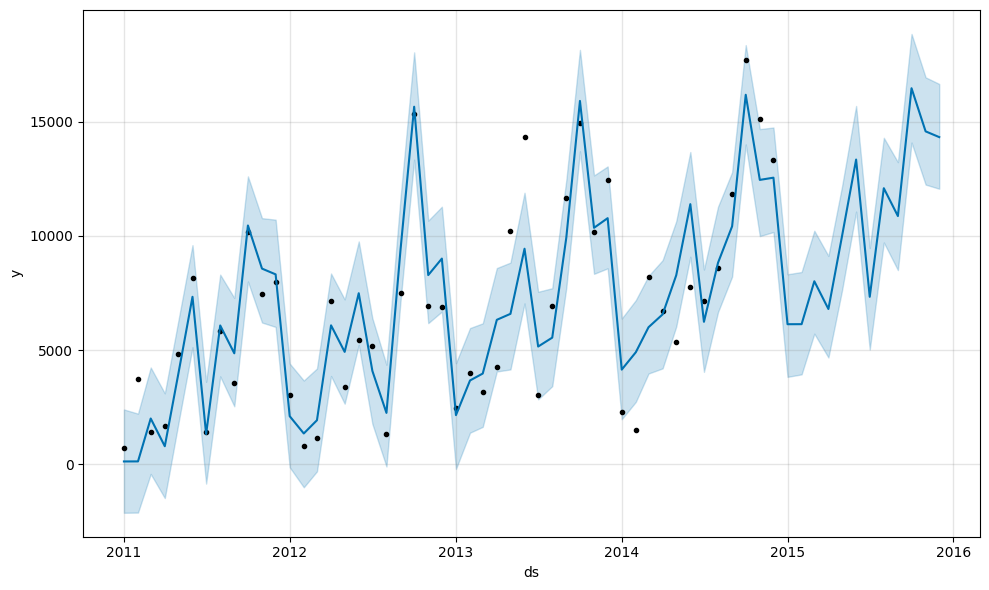

/tmp/ipykernel_3523/3734246913.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_region.append(
23:25:31 - cmdstanpy - INFO - Chain [1] start processing
23:25:31 - cmdstanpy - INFO - Chain [1] done processing


North Asia


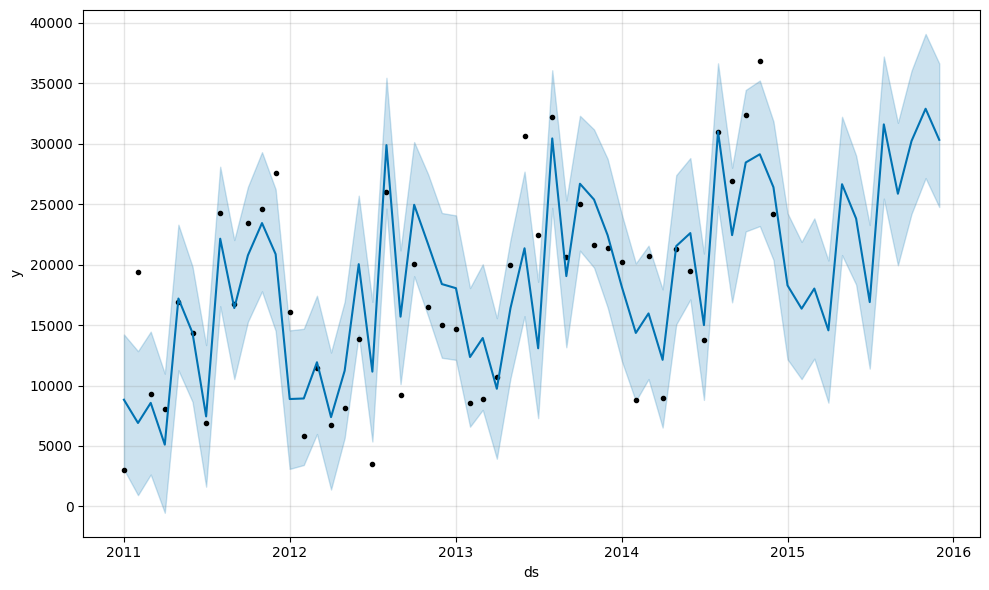

/tmp/ipykernel_3523/3734246913.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_region.append(
23:25:32 - cmdstanpy - INFO - Chain [1] start processing


Southeast Asia


23:25:32 - cmdstanpy - INFO - Chain [1] done processing


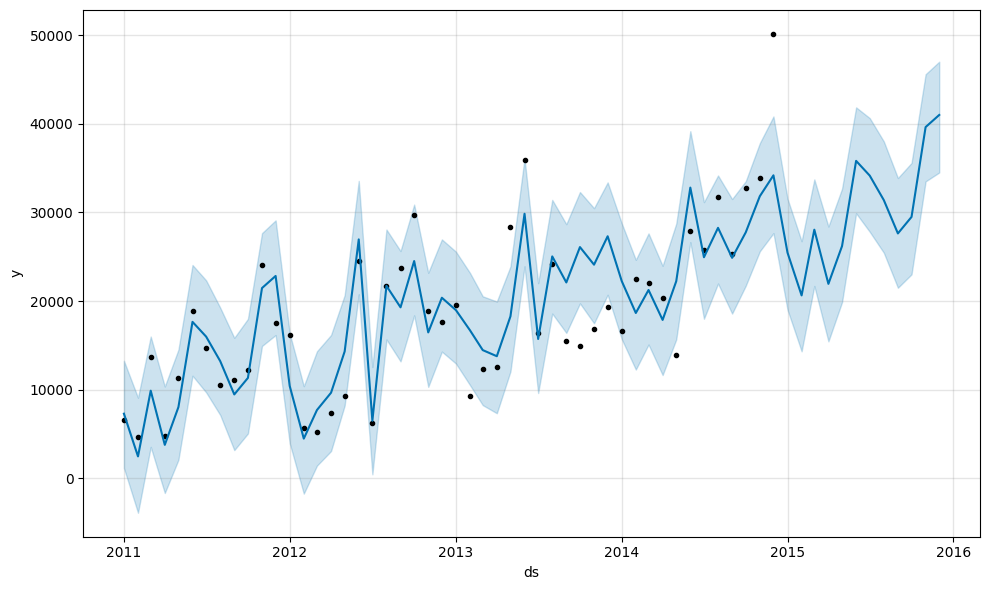

/tmp/ipykernel_3523/3734246913.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_region.append(
23:25:33 - cmdstanpy - INFO - Chain [1] start processing
23:25:33 - cmdstanpy - INFO - Chain [1] done processing


Central Asia


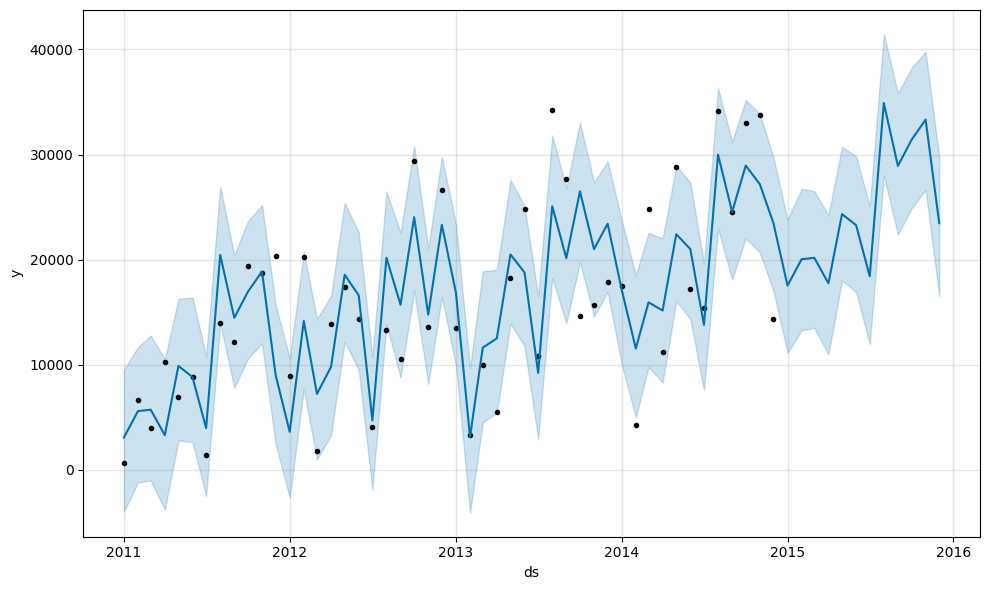

/tmp/ipykernel_3523/3734246913.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_region.append(
23:25:34 - cmdstanpy - INFO - Chain [1] start processing
23:25:34 - cmdstanpy - INFO - Chain [1] done processing


Oceania


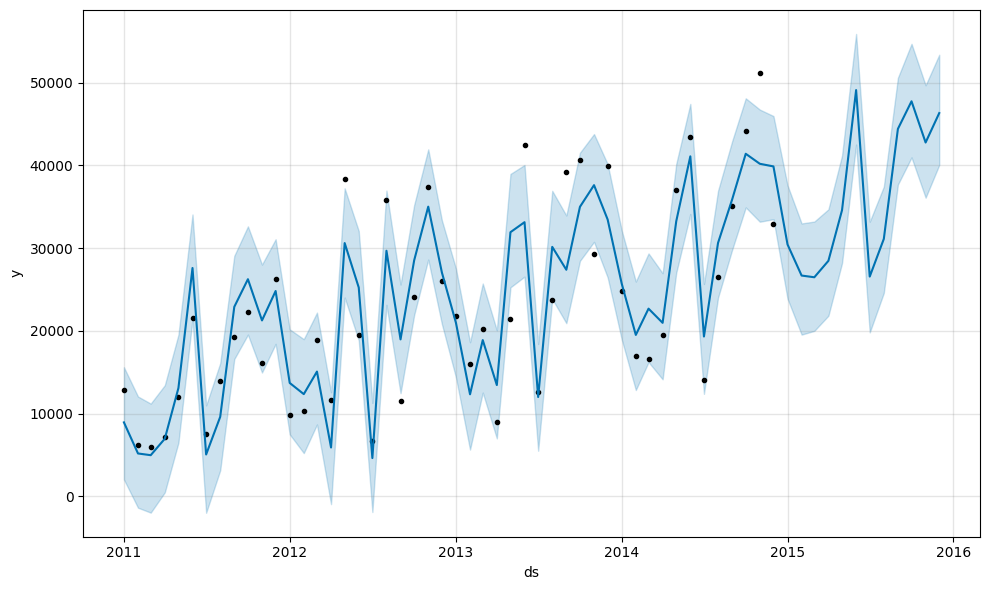

/tmp/ipykernel_3523/3734246913.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_region.append(
23:25:34 - cmdstanpy - INFO - Chain [1] start processing


West


23:25:35 - cmdstanpy - INFO - Chain [1] done processing


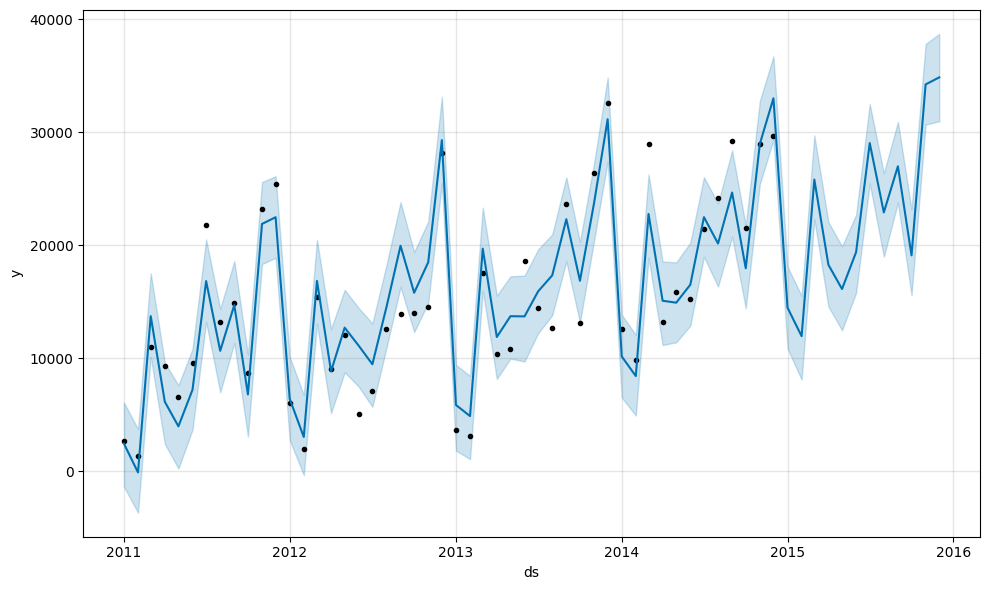

/tmp/ipykernel_3523/3734246913.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_region.append(
23:25:35 - cmdstanpy - INFO - Chain [1] start processing


East


23:25:36 - cmdstanpy - INFO - Chain [1] done processing


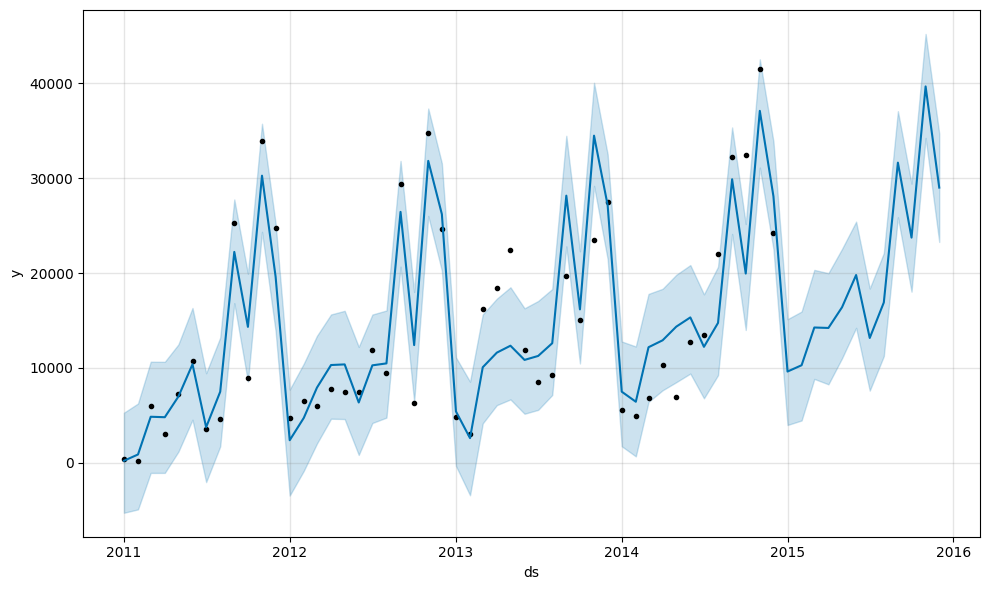

/tmp/ipykernel_3523/3734246913.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_region.append(
23:25:36 - cmdstanpy - INFO - Chain [1] start processing


Africa


23:25:36 - cmdstanpy - INFO - Chain [1] done processing


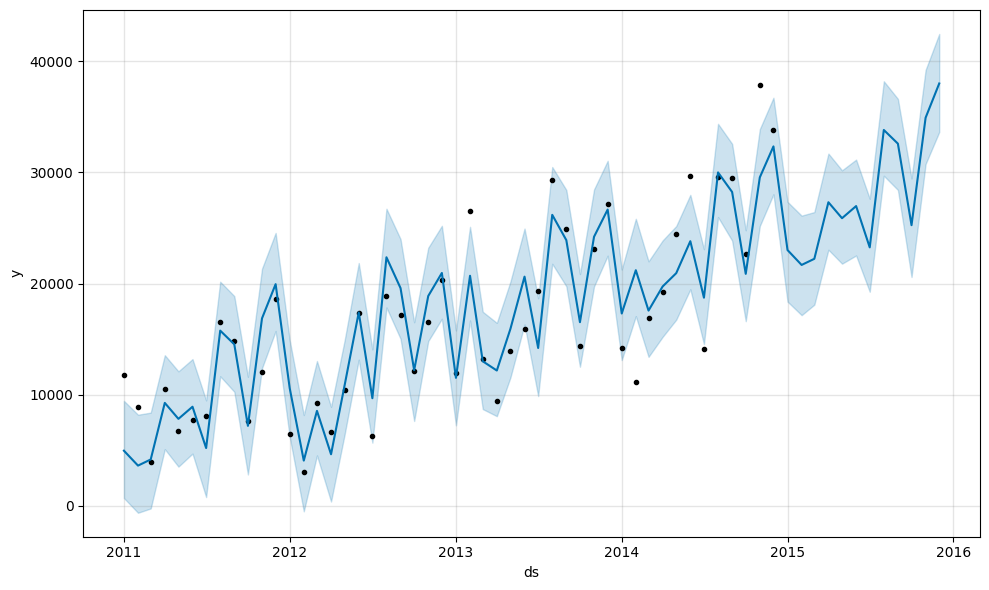

/tmp/ipykernel_3523/3734246913.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_region.append(
23:25:37 - cmdstanpy - INFO - Chain [1] start processing


EMEA


23:25:37 - cmdstanpy - INFO - Chain [1] done processing


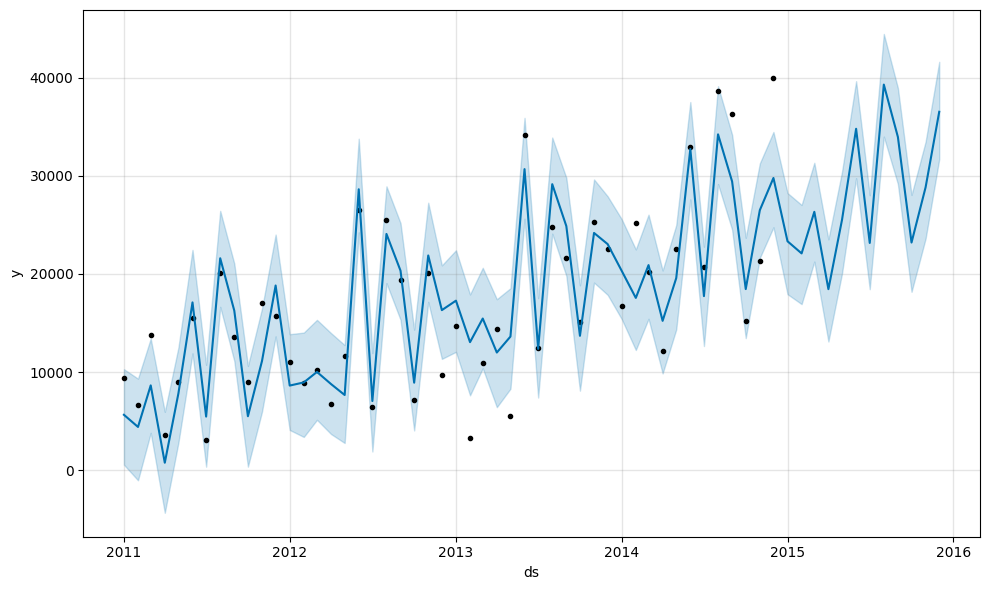

/tmp/ipykernel_3523/3734246913.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_region.append(
23:25:38 - cmdstanpy - INFO - Chain [1] start processing


Canada


23:25:38 - cmdstanpy - INFO - Chain [1] done processing


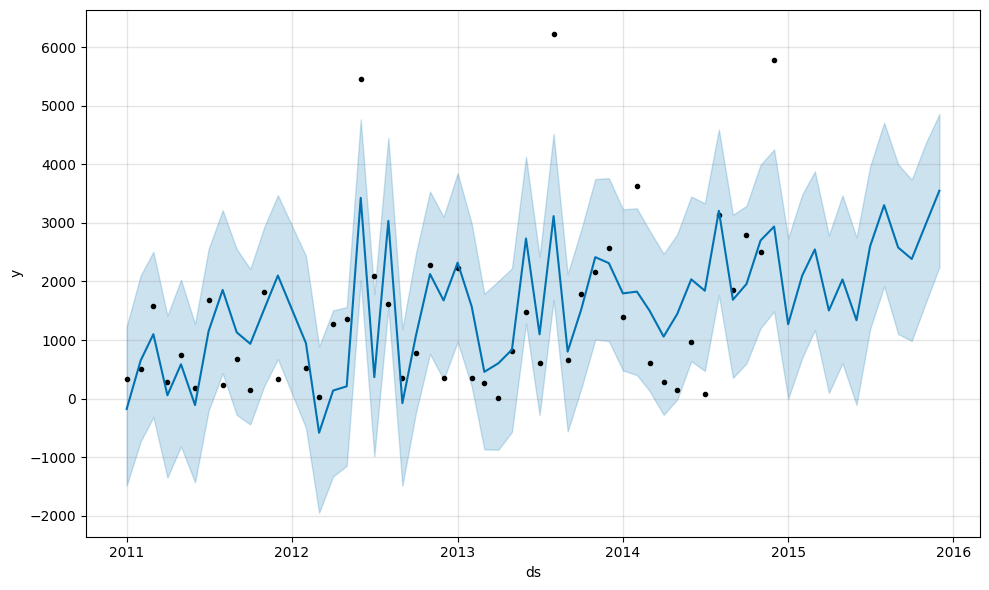

/tmp/ipykernel_3523/3734246913.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regressao_region = regressao_region.append(


,Region,ds,yhat,yhat_lower,yhat_upper
0,North,2011-01-01,9412.949836,3750.925501,14780.557280
1,North,2011-02-01,4248.405659,-1047.213869,10204.315005
2,North,2011-03-01,12299.283979,6842.142126,18029.097984
3,North,2011-04-01,7299.836807,1231.247654,12979.095029
4,North,2011-05-01,9745.802121,4111.584514,15904.736894
...,...,...,...,...,...
774,Canada,2015-08-01,3302.438715,1917.955719,4708.758228
775,Canada,2015-09-01,2578.983705,1101.219741,3999.299693
776,Canada,2015-10-01,2383.202909,985.519118,3735.341819
777,Canada,2015-11-01,2978.114609,1633.674830,4358.644363


In [13]:
regressao_region = pd.DataFrame()
for region in data['Region'].unique():
    print(region)
    regressao = data[data['Region'] == region][
        ['Order Date Month', 'Sales']
    ].groupby('Order Date Month')['Sales'].sum().reset_index()
    regressao = regressao.rename(columns={
        'Order Date Month': 'ds', 'Sales': 'y'
    })
    m = Prophet().fit(regressao)
    future = m.make_future_dataframe(periods=12, freq='MS')
    forecast = m.predict(future)
    forecast['Region'] = region
    fig1 = m.plot(forecast)
    plt.show()
    regressao_region = regressao_region.append(
        forecast[['Region', 'ds', 'yhat', 'yhat_lower', 'yhat_upper']],
        ignore_index = True
    )
regressao_region

In [ ]:
regressao_region.to_feather('base/regressao_regiao.feather')